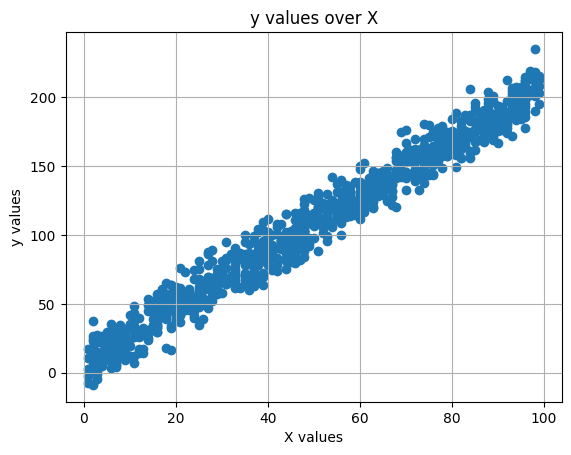

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# y = 2x + 8.2

np.random.seed(13)
X = np.random.randint(1,100, 1000)
y = 2 * X + 8.2 + np.random.normal(0,10,1000)
plt.scatter(X,y)
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("y values over X")
plt.grid()

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

X_train = X_train.astype(float).reshape(-1)
y_train = y_train.astype(float).reshape(-1)

m = 0
c = 0
learning_rate = 0.0001
epochs = 62000
n = len(X_train)
mc_list = []
mse_list = []
m_list = []

for i in range(epochs):
    y_pred = m * X_train + c
    error = y_train - y_pred
    #Gradient
    dm = (-2/n) * np.sum(X_train * error)
    dc = (-2/n) * np.sum(error)
    #Updating parameter
    m = m - learning_rate * dm
    c = c - learning_rate * dc
    #Mean squared error
    mse = (error**2).mean()
    mc_list.append((m,c))
    mse_list.append(mse)
    m_list.append(m)
    if i % 100 == 0:
        print(f"Epoch: {i}: m = {m:.4f}, c = {c:.4f}, mse = {mse:.4f}")

print(f"Final equation: y = {m:.2f}x + {c:.2f}")

Epoch: 0: m = 1.3557, c = 0.0213, mse = 14543.2913
Epoch: 100: m = 2.1276, c = 0.0699, mse = 113.8085
Epoch: 200: m = 2.1271, c = 0.1064, mse = 113.6754
Epoch: 300: m = 2.1265, c = 0.1427, mse = 113.5435
Epoch: 400: m = 2.1260, c = 0.1788, mse = 113.4130
Epoch: 500: m = 2.1254, c = 0.2147, mse = 113.2836
Epoch: 600: m = 2.1249, c = 0.2505, mse = 113.1556
Epoch: 700: m = 2.1243, c = 0.2861, mse = 113.0287
Epoch: 800: m = 2.1238, c = 0.3216, mse = 112.9031
Epoch: 900: m = 2.1232, c = 0.3568, mse = 112.7787
Epoch: 1000: m = 2.1227, c = 0.3919, mse = 112.6555
Epoch: 1100: m = 2.1221, c = 0.4269, mse = 112.5334
Epoch: 1200: m = 2.1216, c = 0.4616, mse = 112.4125
Epoch: 1300: m = 2.1211, c = 0.4962, mse = 112.2928
Epoch: 1400: m = 2.1205, c = 0.5306, mse = 112.1743
Epoch: 1500: m = 2.1200, c = 0.5649, mse = 112.0569
Epoch: 1600: m = 2.1195, c = 0.5990, mse = 111.9406
Epoch: 1700: m = 2.1189, c = 0.6329, mse = 111.8254
Epoch: 1800: m = 2.1184, c = 0.6667, mse = 111.7113
Epoch: 1900: m = 2.117

Text(0.5, 1.0, 'Loss vs Epochs')

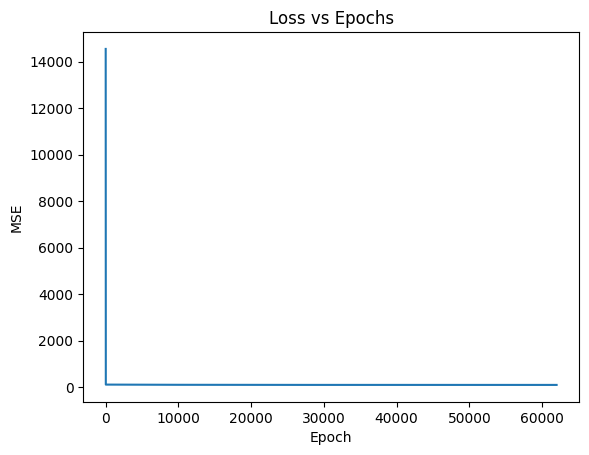

In [34]:
plt.plot(range(len(mse_list)), mse_list)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Loss vs Epochs")


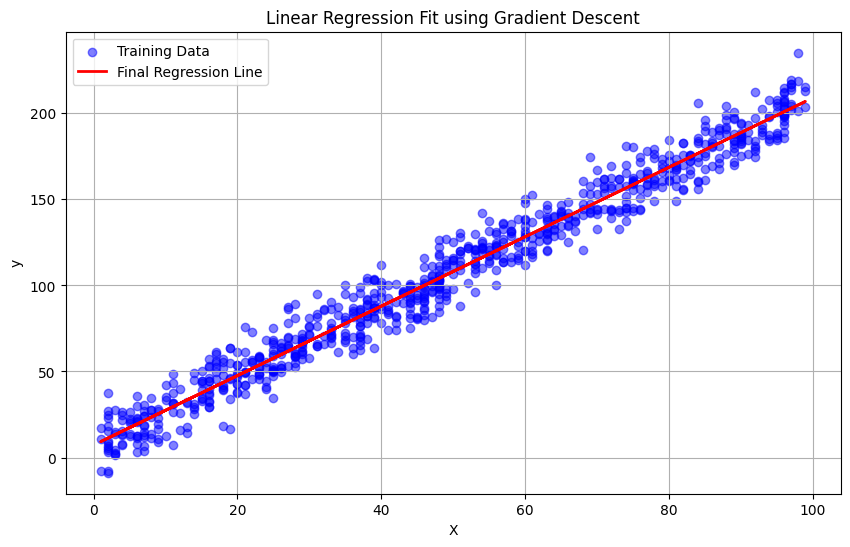

In [30]:
import matplotlib.pyplot as plt

# Scatter plot of actual training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.5)

# Plot final regression line
y_line = m * X_train + c
plt.plot(X_train, y_line, color='red', label='Final Regression Line', linewidth=2)

plt.title('Linear Regression Fit using Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


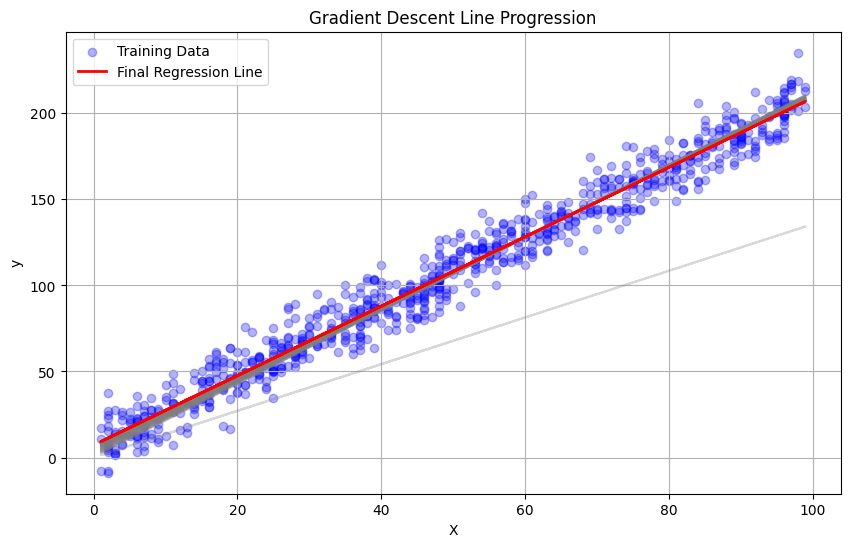

In [36]:
# Visualizing learning process
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.3)

# Plot line every N epochs
for idx in range(0, len(mc_list), 1000):  # every 1000 steps
    m_temp, c_temp = mc_list[idx]
    y_temp = m_temp * X_train + c_temp
    plt.plot(X_train, y_temp, color='gray', alpha=0.3)

# Final line in red
final_y = m * X_train + c
plt.plot(X_train, final_y, color='red', label='Final Regression Line', linewidth=2)

plt.title('Gradient Descent Line Progression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
